# ECH 60 Spring 2020 week 4
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

**[(4.1) Line and Curve Fitting](#fitting) (Monday, Wednesday)**
*  [Least-squares linear fit](#leastsquares) <br>
*  [Goodness of fit](#rsquared) <br>
*  [Nonlinear fits using linear regression](#nonlinear) <br>
*  [Polynomial Fits](#polynom) <br>

**[(4.2) Interpolation](#interp) (Friday)**
*  [Langrange Interpolation](#lagrange) <br>
*  [Splines](#spline) <br>

**[Practice problems](#exer)**



<a id='stat'></a>

## (4.1) Line and Curve Fitting

It is common in all scientific fields to have a set of dependent $(y)$ and independent $(x)$ data and to use it to predict values of $y$ beyond what it measured or even measurable. This involves determining the approximate function $y(x)$ by interpolation or fitting/regression. Interpolants necessarily pass through all available data, while regression models the response using a physically expected _form_ (linear, quadratic, exponential, power law, algebraic, ...) with the least error. 


<a id='leastsquares'></a>



### Least-Squares Linear Fit

Imagine that a measurement gives data that you know must look like a straight line. But like most real measurements, the data turns out to _noisy,_ meaning that there are fluctuations about a general trend. We can create a data set to mimic noise by adding a random variable:

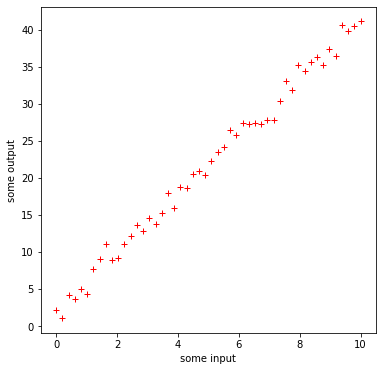

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,10)
y=2.+4.*x+np.random.normal(0,1,len(x))

plt.figure(figsize=(6,6))
plt.plot(x,y,'r+')
plt.xlabel('some input')
plt.ylabel('some output')
plt.show()

Without knowing anything about how the data was generated, we can tell that the trend is _linear,_ meaning that we can imagine a line of the form $f=a+bx$ that 'passes in between' and fits this data. Once we know the line, we have the power of prediction: we can tell what the output must be for _any_ input in this range. Or we can generate deeper insights like the rate of change of $y$ (via $f$) with $x$ in terms of the slope, $b$. Determining such a line is therefore of great value, and is the fundamental problem of linear regression.

Of course, we can already tell that no straight line passes through _all_ the points in the data set. But we can find one that minimizes the error relative to actual data points. So we have to quantify errors of the fit versus real data. The error at each available $(x,y)$ position is the difference between the actual value $y$ and the fitted value $f$. So maybe a good measure of the total error is the sum of all these individual deviations at all available $x$ locations.

However, you can also easily tell that some points may lie above the fitted line whereas some others may lie below. The deviations therefore can be negative and some might 'cancel' out positive deviations if we simply add them. A better measure would therefore be absolute values of these deviations, but that presents mathematical difficulties (not continuously differentiable). The solution then is to take the _square_ of these deviations, giving rise to the idea of least-squares fitting.

#### The math behind least-squared fits

Let's say the available $n$ data points are $x_i,y_i$, and we wish to determine the constants $a$ and $b$ such that the line $f=a+bx$ is the 'best fit'. The vertical deviation at each point is 

$$\delta_i = y_i - f_i=y_i - (a+bx_i),$$ 

where $i=0,1,2,...,n-1$. This means the sum of squares of all these deviations (also called 'residuals') is: 

$$\Delta = \sum_{i=0}^{n-1} \delta_i^2= \sum_{i=0}^{n-1} \left[ y_i^2 - 2a y_i -2bx_i y_i + a^2+2 a b x_i +b^2 x_i^2 \right].$$ 

We want to minimize $\Delta$ with respect to our choice of $a$ and $b$, and we know from calculus that minimas (or maximas) of a function have zero slope. So we will require derivates of $\Delta$ with $a$ and $b$ to be zero:

$$\frac{\partial \Delta}{\partial a} = 0 = -2 \sum_{i=0}^{n-1} y_i + 2an + 2 b \sum_{i=0}^{n-1}x_i,$$
$$\frac{\partial \Delta}{\partial b} = 0 = -2 \sum_{i=0}^{n-1} x_i y_i + 2 a \sum_{i=0}^{n-1}x_i + 2 b \sum_{i=0}^{n-1}x_i^2.$$

_(Thought exercise: a zero slope can represent a minima or a maxima. Why are we not concerned about accidentally catching the maxima here...?)_


For convenient notation, let's define the following sums:

$$ S_x = \sum_{i=0}^{n-1}x_i, \qquad S_y = \sum_{i=0}^{n-1}y_i, \qquad S_{xy} = \sum_{i=0}^{n-1}x_i y_i, \qquad S_{xx} = \sum_{i=0}^{n-1}x_i^2, \qquad $$

so that the zero slope conditions from above become:

$$ an + b S_{x} = S_{y},$$
$$ a S_{x} + b S_{xx} =  S_{xy},$$

which is a linear system for 2 unknowns $a$ and $b$. This is a straightforward equation to solve manually, and yields:

$$ a = \frac{S_{x}S_{xy}-S_{y}S_{xx}}{S_{x}^2-nS_{xx}},$$

$$ b = \frac{S_{x}S_{y}-n S_{xy}}{S_{x}^2-n S_{xx}} .$$

And that's it! These are direct formulas for the fitting constants $a$ and $b$ that make up our least-squares linear fit. The algorithm is then simple: first, calculate the sums $S_{x}$, $S_{y}$, $S_{xy}$ and $S_{xx}$ from the given data points $(x_i,y_i)$. Then, use the above formula to obtain the slope and intercept. As an exercise, write this function:

In [18]:
## Linear least-squares fit function linfit(x,y)
## input: two arrays of same length: x and y
## output: a and b so that a+by is the least-squares fit to the data


Now use this function to determine the intercept and slope of the data set in the plot at the begining of this section and plot both the raw data and your fitted equation $ax+b$:

In [1]:
# Determine a and b from data set using linfit
# use same x and y as above
# plot data points and the fitted line

<a id='rsquared'></a>



### Goodness of fit

Just because a data set 'looks' linear does not mean that a straight line is the best fit through it. A good measure of a 'goodness of fit' is the coefficient of determination, also known as the $R^2$. This is the ratio of the variance predicted by the fit to the variance of the actual data. $R^2$ is in the range $0$ to $1$ _(can it be negative? why or why not?)_ 

For example, $R^2=0.6$ implies that 60% of the variability in the real data is accounted for by the fit, while the remaining 40% is lost. The closer the fit is to the real data, the closer $R^2$ is to 1. 

Let the actual data points be $(x_i,y_i)$ and the corresponding 'fitted' data points be $(x_i,f_i)$ where $f_i=a+b x_i$. Since variance is proportional to the sum of squares of differences from the mean, then the coefficient of determination is 

$$ R^2 = \frac{\Delta_{\rm reg}}{\Delta_{\rm tot}} = 1- \frac{\Delta_{\rm res}}{\Delta_{\rm tot}}, $$

where the total, regression, and residual square-sums are respectively

$$ \Delta_{\rm tot} = \sum_{i=0}^{n-1} \left(y_i - \bar{y}\right)^2,\qquad \Delta_{\rm reg} = \sum_{i=0}^{n-1} \left(f_i - \bar{y}\right)^2, \qquad \Delta_{\rm res} = \sum_{i=0}^{n-1} \left(y_i - f_i\right)^2,$$

and $\bar{y}$ is the mean of the data set $y_i$. 

The following function is one way to determine $R^2$ when given arrays corresponding to $(x_i,y_i)$ and the fitted array $y_i$. Better yet, modify your `linfit` function to return a third argument that expresses the goodness of fit.

In [96]:
## function rsquared(x,y,a,b)
## returns coeff of determination given arrays x,y (of same size) and fit constants a,b

def rsquared(x,y,yfit):
    ymean=np.mean(y)
    sstot=sum((y-ymean)**2)
    ssres=sum((y-yfit)**2)
    rs=1-ssres/sstot
    return rs

While large R-squared values typically imply a good fit, one has to be careful about what this means. The larger the residuals (difference between the real and fitted values at each $x$), the higher the likelyhood that the fit is a simply drawing the best line through possibly nonlinear data. Conversely, the same fit with $R^2$ far from 1 could represent entirely different data sets. Nonlinear variations and outliers are common reasons for lower $R^2$ in linear fits, and therefore a bad quality of fit. For instance, generate linear fits for the data sets in [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)). Calculate and plot the $R^2$ of each. Are the fits good representations of the data in these cases?

<a id='nonlinear'></a>



### Nonlinear fits using linear regression

Is that even possible?! A straight line $a+bx$ obviously cannot fit a nonlinear data set (at least with any reasonable degree of accuracy!). However, some nonlinear physical processes have shapes or trends that are amenable to manipulations that convert it to a linear data set.

For example, many growth processes (bacterial counts, viral infections like in the news these days, 'viral' tweets on social media) are exponential processes at least for a while. One becomes two, two becomes four, four becomes eight, and so on. This is a very nonlinear trend written generally as $y=c e^{kx}$, where $c$ and $k$ are some constants (in the context of growth, $k$ is called the 'growth rate'). We have no hope of fitting a single straight line through such data. For example, the two columns in this dataset file `bacteria.csv` contain bacterial density (thousands per cubic centimeter) as a function of time:

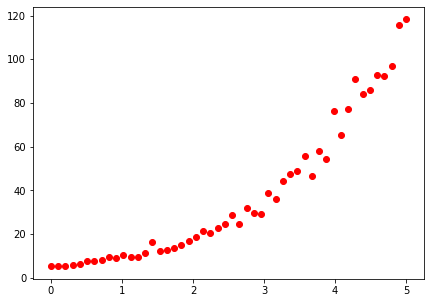

In [25]:
# load file
bact_data=np.loadtxt("bacteria.csv", delimiter=",")

# slice into x (time) and y (bacterial counts)
x=bact_data[:,0]
y=bact_data[:,1]

# plot
plt.figure(figsize=(7,5))
plt.plot(x,y,'ro')
#plt.semilogy(x,y,'ro')  # use this to see in semilog form
plt.show()

You can try drawing straight lines by hand and it's obvious that the data is nonlinear.

However, taking the natural logarithm of this function gives 
$$ \ln y = \ln c + kx$$

Defining $Y=\ln y$ and $C=\ln c$, we realize that this is a linear equation in disguise: $ Y = C + k x$. In the plot above, this is equivalent to plotting the y-axis on a log scale. Try using `semilogy`: does the data set 'look' more like a straight line in this representation?


Thus, fitting a given data set $(x,y)$ that we know corresponds to an exponential process therefore reduces to performing the linear regression of the _modified_ data set $(x,\ln y)$. Then, we can convert the 'usual' linear fit constants $a$ and $b$ back to the exponential world using $b=k$ and $a=C=\ln c$, which gives $c=e^a$.

In [20]:
# finds fits of the kind y=c*exp(k x)
# returns c,k given data sets x,y
# uses previous function linfit

def expfit(x,y):
    mod_y=np.log(y)
    a,b=linfit(x,mod_y) # assuming this function has been created above
    return np.exp(a),b

Use this function to generate `c` and `k` corresponding to the bacterial data above. And plot this on top of the data points using `c,k=expfit(x,y)` and `plt.plot(x,c*np.exp(k*x),'b-')` above. How does your plot look? 

You can determine the coefficient of determination in this case too. How good is your exponential fit?

In [30]:
# uncomment the following to calculate R^2, format of rsquared(x,y,yfit)

# c,k=expfit(x,y)
# rsquared(x,y,c*np.exp(k*x))

Of course, this trick of recasting into a linear form works only if we have a sense of what the trend is (typically motivated by the physical process it represents: in the previous example, growth is typically exponential). What if we do not know what nonlinear function to fit?

A good way to test potential manipulations is to plot in logarithmic axis and see if a straight-line trend emerges, like we saw above. For example, what if a `semilogy` plot still doesn't quite look like a line, but a `semilogx` does? This suggests a data set of the type $y=a+b\ln x$. Again, this is easily converted to a modified data set amenable to linear regression.


What if the data only appears like a straight line on `loglog` plot? This suggests something like $\ln y=a+b \ln x$, which represents data of the type $y=A x^b$ where $A=e^a$. In other words, such data follows a _power law_ behavior with an exponent $b$. This is fairly powerful because the exponent can be a negative number or a non-integer. We can therefore use this trick to fit functions of the form $y= 1/x^2=x^{-2}$ or $y=\sqrt[3]{x}=x^{1/3}$.

If all of this fails, we could also try plotting the reciprocal of the data sets (provided there is no accidental division by zero). If $1/y$ varies linearly with $x$, the data is likely of the algebraic kind. This means that a linear regression would give $1/y=a +b x$ which corresponds to nonlinear functions of the form $y=1/(a+bx)$.

And if $1/y$ varies linearly with $1/x$, a linear regression of the type $1/y=a +b/x$ would work. The data then likely is a nonlinear function of the type $y=x/(ax+b)$ or equivalently $y=m x/(x+n)$.

In all these cases, you can still define an $R^2$ relative to the linear version of the system you are fitting. If none of these tricks work, we likely have nonlinear data that needs polynomial fits.


<a id='polynom'></a>



### Polynomial Fits

We can extend the ideas of linear regression to fit a polynomial of _degree_ $m$:

$$y=a_0 + a_1 x + a_2 x^2 + ... + a_m x^m = \sum_{i=0}^m a_ix^i$$

through $n$ data points. A data set of $n$ data points can be fit to a polynomial of order up to $m=n-1$. However, fitting with a polynomial with 'too high' of an order can lead to errors. The art is to picks the lowest order polynomial that works best for the given data. 

The math is the same as above. We first determine a fit function $f$ which corresponds to the $y$ values at $x$ locations of our data set. Let's say we want to fit a quadratic (2nd order, so $m=2$) polynomial through a data set containing $n=5$ points. A 'perfect' fit of the form $a_0 +a_1 x_i + a_2 x_i^2$ would require every the function to pass through every point $y_i$:

$$ a_0 +a_1 x_0 + a_2 x_0^2 = y_0\\a_0 +a_1 x_1 + a_2 x_1^2 = y_1\\a_0 +a_1 x_2 + a_2 x_2^2 = y_2\\a_0 +a_1 x_3 + a_2 x_3^2 = y_3\\a_0 +a_1 x_4 + a_2 x_4^2 = y_4$$


The fit constants $\left\{a_0,a_1,a_2\right\}$ are the unknowns. In matrix version, this system looks like:

$$\begin{bmatrix} 1 & x_0 & x_0^2 \\1 & x_1 & x_1^2\\1 & x_2 & x_2^2\\1 & x_3 & x_3^2\\1 & x_4 & x_4^2 \end{bmatrix} \begin{bmatrix} a_0 \\a_1\\a_2 \end{bmatrix}=\begin{bmatrix} y_0 \\y_1\\y_2\\ y_3 \\ y_4 \end{bmatrix}$$

The matrix is not square! This system is over-determined, and cannot be solved uniquely. We could force a square by picking only 3 of the data points, but which three would we choose? That's not a great strategy anyway because we would like our model to fit _all_ data points. 

The trick then is to use regression: instead of forcing our fit to pass through every point, we instead minimize the errors or residuals exactly like before. Let's find the square sum of residuals or deviation of our fit $f=(a_0+a_1x + a_2x^2)$ from the actual data points

$$\Delta = \sum_{i=0}^{n-1} \left(y_i - f_i \right)^2= \sum_{i=0}^{n-1} \left[ y_i - (a_0+a_1x_i + a_2x_i^2) \right]^2.$$

Like before, we want to minimize $\Delta$ with respect to our choice of $a_0$, $a_1$ and $a_2$. So setting derivates of $\Delta$ with these parameters to zero gives:

$$\frac{\partial \Delta}{\partial a_0} = 0 = -2 \sum_{i=0}^{n-1}  \left[ y_i - (a_0+a_1x_i + a_2x_i^2) \right]^2,\\
\frac{\partial \Delta}{\partial a_1} = 0 = -2 \sum_{i=0}^{n-1}  x_i\left[ y_i - (a_0+a_1x_i + a_2x_i^2) \right]^2,\\
\frac{\partial \Delta}{\partial a_2} = 0 = -2 \sum_{i=0}^{n-1}  x_i^2\left[ y_i - (a_0+a_1x_i + a_2x_i^2) \right]^2.$$

Rearranging this system gives (looks complicated but is pretty straightforward, try this by hand):

$$ n a_0 + \left( \sum_{i=0}^{n-1} x_i \right) a_1 + \left( \sum_{i=0}^{n-1} x_i^2 \right) a_2 = \sum_{i=0}^{n-1} y_i \\ 
\left( \sum_{i=0}^{n-1} x_i \right) a_0 + \left( \sum_{i=0}^{n-1} x_i^2 \right) a_1 + \left( \sum_{i=0}^{n-1} x_i^3 \right) a_2 = \sum_{i=0}^{n-1} x_iy_i\\
\left( \sum_{i=0}^{n-1} x_i^2 \right) a_0 + \left( \sum_{i=0}^{n-1} x_i^3 \right) a_1 + \left( \sum_{i=0}^{n-1} x_i^4 \right) a_2 = \sum_{i=0}^{n-1} x_i^2 y_i $$

Now this is a system of three linear equations in the three unknowns $\left\{a_0,a_1,a_2\right\}$. In general, there are $m+1$ equations and unknowns where $m$ is the order of the polynomial being fit. In the case of the quadratic fit above, we can write this in matrix notation as

$$   \begin{bmatrix} n & \displaystyle\sum_{i=0}^{n-1} x_i & \displaystyle\sum_{i=0}^{n-1} x_i^2 \\  \displaystyle\sum_{i=0}^{n-1} x_i & \displaystyle\sum_{i=0}^{n-1} x_i^2 & \displaystyle\sum_{i=0}^{n-1} x_i^3 \\ \displaystyle\sum_{i=0}^{n-1} x_i^2 & \displaystyle\sum_{i=0}^{n-1} x_i^3 & \displaystyle\sum_{i=0}^{n-1} x_i^4 \\ \end{bmatrix} \begin{bmatrix} a_0 \\a_1 \\a_2 \end{bmatrix} =\begin{bmatrix}  \displaystyle\sum_{i=0}^{n-1} y_i \\  \displaystyle\sum_{i=0}^{n-1} x_iy_i \\ \displaystyle\sum_{i=0}^{n-1} x_i^2y_i  \\ \end{bmatrix}$$

Although this looks complicated, it's a fairly simply matrix because all entries are sums of given data points and can be evaluated with a single `sum` operation like we have used before. Once you have a matrix and RHS column, use elimination routines you developed in tutorial 3 (or inbuilt `linalg` solvers) to find $\left\{a_0,a_1,a_2\right\}$.


And the pattern in the matrix is clear too. We can easily write a looped code to extend this to any degree of fit: cubic, quartic, or even a 10th order polynomial (but at most one less than number of available data points). While it's tempting to try higher and higher order polynomials, bear in mind that this can lead to erronous fits. Forcing the fit to pass through more points can lead to oscillations: we will see this with interpolations later. As a rule of thumb, try the lowest degree that can _reasonably_ fit most of your data with the best $R^2$ (defined exactly like before).



In [77]:
# fit a polynomial of degree m through n (x,y) points
# m can be at most n-1

m=3
A=np.zeros((m+1,m+1))
b=np.zeros((m+1,1))

for i in range(m+1):
    for j in range(i,m+1):
        A[i,j]=sum(x**(i+j))
        A[j,i]=A[i,j]
    b[i,0]=sum(y*x**i)
        
a=np.linalg.solve(A,b)

The code above is general for any degree of polynomial $m$. Convert this code to a function that takes the $x$ and $y$ data sets and the desired degree $m$, and gives the fit constants as an output. 

Write a second function that takes the fit constants and the $x$ data set and returns the fitted values $f$ at any _other_ set of $x$ locations.

In [19]:
# fitted values for y_fit
# input x and an array a of m fit constants, and 'other' data points xx
# output fitted values of y at xx

Indeed, 'numpy' has inbuilt calculator to do exactly the same two operations coded above. Look up the documentation for `numpy.polyfit` and `numpy.polyval`, and compare how those functions work relative to your versions above.

To see polynomial fits in action, plot the following data. 

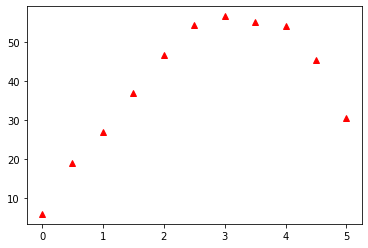

In [59]:
# given data set of 11 points
x=np.linspace(0,5,11)
y=np.array([5.84, 18.95, 26.81, 36.89, 46.57, 54.32,
            56.54, 54.94, 54.03, 45.44, 30.44])

# plot data
plt.plot(x,y,'r^')
plt.show()

Then, generate a cubic polynomial fit using the code from above and plot this on top of the data. See how they compare.

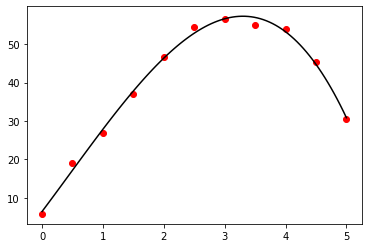

In [97]:
# polynomial fit of degree 3 (cubic)
m=3
A=np.zeros((m+1,m+1))
b=np.zeros((m+1,1))

for i in range(m+1):
    for j in range(i,m+1):
        A[i,j]=sum(x**(i+j))
        A[j,i]=A[i,j]
    b[i,0]=sum(y*x**i)

fit_constants=np.linalg.solve(A,b)

# generate a new array of 100 points

xx=np.linspace(0,5,100)

# y values corresponding to cubic fit equation
# alternatively use numpy polyfit and polyval
yy=fit_constants[0,0]+fit_constants[1,0]*xx+fit_constants[2,0]*xx**2+fit_constants[3,0]*xx**3


# plot both and compare, uncoment following lines to see plot

plt.plot(x,y,'ro')
plt.plot(xx,yy,'k-')
plt.show()

Looks like a cubic fit works reasonably well in this case. Try finding $R^2$ for this fit...


You can use NumPy's inbuilt functions to do the same job as follows. In fact, let's see how polynomials of other degrees compare using NumPy's `polyval` and `polyfit`. Since there are 11 data points, we can go upto 10 (remember n data points can be fitted at most to a polynomial of degree n-1):

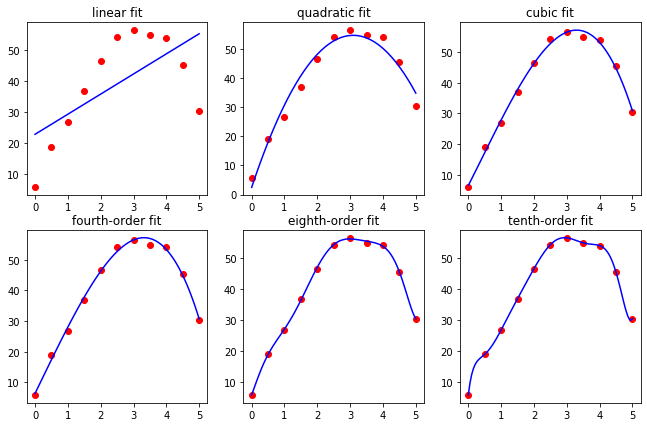

In [17]:
x=np.linspace(0,5,11)
y=np.array([5.84, 18.95, 26.81, 36.89, 46.57, 54.32,
            56.54, 54.94, 54.03, 45.44, 30.44])

# array of x values we wish to plot fit curve of
xx=np.linspace(0,5,100)

# numpy inbuilt function to genereate coefficients for linear fit
fit_linear=np.polyfit(x,y,1)

# y values linear fit at xx locations
yy1 = np.polyval(fit_linear,xx)

# coefficients for quadratic fit and corresponding y values
fit_quadratic=np.polyfit(x,y,2)
yy2 = np.polyval(fit_quadratic,xx)

# coefficients for cubic fit
fit_cubic=np.polyfit(x,y,3)
yy3 = np.polyval(fit_cubic,xx)

# coefficients for fourth order polynomial fit
fit_sixth=np.polyfit(x,y,4)
yy4 = np.polyval(fit_sixth,xx)

# coefficients for eighth order polynomial fit
fit_sixth=np.polyfit(x,y,8)
yy8 = np.polyval(fit_sixth,xx)

# coefficients for 10th order polynomial fit
fit_sixth=np.polyfit(x,y,10)
yy10 = np.polyval(fit_sixth,xx)


# plots 
plt.figure(figsize=(11,7))

plt.subplot(2,3,1)
plt.plot(x,y,'ro')
plt.plot(xx,yy1,'b-')
plt.title('linear fit')

plt.subplot(2,3,2)
plt.plot(x,y,'ro')
plt.plot(xx,yy2,'b-')
plt.title('quadratic fit')

plt.subplot(2,3,3)
plt.plot(x,y,'ro')
plt.plot(xx,yy3,'b-')
plt.title('cubic fit')

plt.subplot(2,3,4)
plt.plot(x,y,'ro')
plt.plot(xx,yy4,'b-')
plt.title('fourth-order fit')

plt.subplot(2,3,5)
plt.plot(x,y,'ro')
plt.plot(xx,yy8,'b-')
plt.title('eighth-order fit')

plt.subplot(2,3,6)
plt.plot(x,y,'ro')
plt.plot(xx,yy10,'b-')
plt.title('tenth-order fit')

plt.show()

These plots highlight a key aspect of fitting (and interpolation, below): while higher order polynomials can pass through more and more data points, they introduce oscillations or wobbles between points that may not be physically accurate. In other words, the 10th order fit above passes through each data points exactly, but it cannot be reliably used to extract a value between the first two data points.





<a id='interp'></a>



## (4.1) Interpolation

Interpolation is curve fitting taken to the next level. So far, the fits resemembled familiar functions (linear, quadratic, exponential, power law) and the objective was the minimize the error. By contrast, interpolation _forces_ the resulting 'fit' to pass through every single data point. While this sounds better, interpolation can get messy and lose all physical meaning if there are a lot of points. In many cases, a physically-relevant regression might be more intuitive and representative of measured data than an interpolant that passes through every single data point.


<a id='lagrange'></a>



### Langrange Interpolation

Many interpolation methods use 'basis' functions to generate the final 'interpolant'. Lagrange polynomials are a popular class of basis functions. To motivate Lagrage polynomials, imagine that we only had two data point $(x_0,y_0)$ and $(x_1,y_1)$. And let's say we are interested in a straight line that fits these points. Consider the following linear function:

$$ y(x)= \frac{x-x_1}{x_0-x_1} y_0 +\frac{x-x_0}{x_1-x_0} y_1$$

You could re-write this in the more familiar $y=a+b x$ form, but the notation above is useful. Think about what happens at $x=x_0$: the second term goes to zero and the term is simply $y_0$. Similarly, the first term goes to zero and the function is just $y_1$ when $x=x_1$. In other words, the function is constrained to pass through the two data points! There is no excuse, and no room for error: the fit absolutely satisfies the given data points. 

We can extend this idea of 'forcing' fits to quadratic order. Let's say we have three data points: $(x_0,y_0)$, $(x_1,y_1)$ and $(x_2,y_2)$. Then, the function

$$ y(x)= \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} y_0 + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} y_1+ \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} y_2$$

The pattern is clear. The function is designed to take the exact value of $y_0$, $y_1$, or $y_2$ at $x_0$, $x_1$, or $x_2$, respectively. By choosing the correct numerators and denominators, the function is forced to go through these points.

These terms that multiply the $y$ data points are the Lagrange basis functions. Notice that the degree of these polynomials is $n-1$ when interpolating between $n$ points. So, we can generalize to any number of points as follows:

$$ y(x) = \sum_{i=0}^{n-1} l_i (x) y _i ,$$

where each Lagrange basis functions are, using the product notation,

$$ l_i(x) = \prod_{j=0,\, j\neq i}^{n-1} \frac{x-x_j}{x_i-x_j}.$$

Like before, the i-th basis function is crafted such that it becomes $1$ when $x=x_i$ and it becomes $0$ for any other data point $x_j$. Premultiplying these with the data points ensures that the function satisfies $y(x_i)=y_i$ at every point.

Coding this up is straightforward: it would need an inner loop to perform the product to determine each basis function and multiply that with the corresponding $y_i$, and then an outer loop to sum up all these terms to get the final $y(x)$. Try this below. With interpolations, unlike with fits, we are interested less in the form of the fitted function and more in it's ability to predict what's between; so try to write to code in a way that handles an array input for the points at which you seek the interpolated values. In other words, vectorize your code!

In [20]:
## lagrange interpolator
## provide x and y data sets, and xx locations at which interpolation is being calculated.
## if xx is a single entry, provide it as an array
## returns yy=y(xx)

def lagrange(x,y,xx):
    n=len(x)
    yy=np.zeros(xx.shape)
    for i in range(n):
        product=y[i]
        for j in range(n):
            if j!=i:
                product*=(xx-x[j])/(x[i]-x[j])
        yy+=product
    return yy

Use this function to plot an interpolant to the same data set from above:

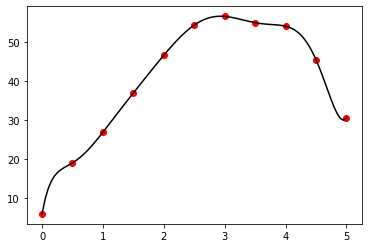

In [21]:
x=np.linspace(0,5,11)
y=np.array([5.84, 18.95, 26.81, 36.89, 46.57, 54.32,
            56.54, 54.94, 54.03, 45.44, 30.44])

xx=np.linspace(0,5,100)

# y values corresponding to lagrange interpolation
yy=lagrange(x,y,xx)


# plot both and compare, uncoment following lines to see plot

plt.plot(x,y,'ro')
plt.plot(xx,yy,'k-')
plt.show()

You can see the problem with 'forcing' the curve to pass through more points. Higher and higher order polynomials are required to fit more points exactly, and the function might 'oscillate' at the ends. You can see this effect by 'exptrapolating' beyond the range. Change the variable `xx` to go beyond the data range (e.g even upto xx=5.2) and see what happens!

Compare this 10-order interpolant (because there are 11 data points) to the cubic polynomial fit above. The fit doesn't pass through all points, but is a simple cubic trend and is easy to write out. The interpolant, on the other hand, passes through every point but is a complicated higher order polynomial so it oscillated heavily. So, again, a lower order regression or interpolation might be more insightful and physically appropriate than trying to perfectly fit every single point.

<a id='spline'></a>



### Splines

So far, with both regression and Lagrange (or any other basis) interpolations, we used _global_ functions. What this means is that the resulting regression function or interpolant was the same for the entire range of $(x,y)$ values. 

Splines, by contrast, are interpolants that use a fairly simple concept: why not focus on just two adjacent points at a time? In other words, splines interpolate _locally_. This comes with the huge advantage that the _piecewise_ behavior is better suited to the local neighborhood. Local behavior is extremely well captured by lower order polynomials so we get a lot more accuracy with a lower order polynomial. In doing so, splines avoid the oscillations associated with high degree polynomial fits for large number of points. However, all this means that splines take different functional forms in each interval between two adjacent points, and therefore the algorithm is longer and the book-keeping can be a mess. So we won't develop our own spline routines (unless you are adventurous and want to... in which case, go right ahead); we will instead learn the idea behind it and learn to use python's inbuilt spline functions.

Because splines are piecewise, we can only define it between two adjacent data points $(x_i,y_i)$ and $(x_{i+1},y_{i+1})$. And we repeate this for every pair of adjacent points. For a data set of $n$ points, there will thus be $n-1$ piecewise splines. A piecewise linear spline in the range $x_i\leq x \leq x_{i+1}$ would be represented as 

$$ g_i(x) = a_i + b_i x, $$

where the subscripts on the fit constants denote that these parameters depend on the interval we are interested in. This particular 'piece' must pass through the ends of this interval, so $ g_i(x_i) = y_i$ and $ g_i(x_{i+1}) = y_{i+1}$. Solving for $a_i$ and $b_i$ in every interval therefore gives each linear piece.

However, a bunch of line segments connecting points is not particularly interesting. So let's try a piecewise quadratic spline in the range $x_i\leq x \leq x_{i+1}$:

$$ g_i(x) = a_i + b_i x + c_i x^2. $$

Across $n-1$ intervals, this generates $3n-3$ unknown fit constants. Like with linear splines, forcing each piece to pass through the interval ends gives $2(n-1)$ conditions. We further enforce that the _slope_ of each piece (derivative of $g_i(x)$) matches its neighbor, which gives $n-2$ conditions across all non-end points. That is still one equation shy of what's needed, and typically a slope or curvature at the end point is provided to make this work. Quadratic splines therefore pass through all points and have a continuous slope.

Similarly, we can construct piecewise cubic splines:

$$ g_i(x) = a_i + b_i x + c_i x^2 + d_i x^3. $$

In this case, the $4n-4$ conditions for the constants come from $2(n-1)$ function values, $n-2$ slope continuity conditions, and another $n-2$ _curvature_ (second derivative of $g_i(x)$) continuity equations, and $2$ end conditions. Cubic splines therefore pass through all points, match slope between pieces, _and_ match curvature between pieces.

Cubic splines are the most popular, and are at the goldilocks sweet spot of just complex enough and not too complex, while providing accuracy and stability for most applications. It is popular even in graphic design (drawing smooth lines in painting/vector graphics software, in animation, in smooth CNC machining algorithms etc.). Physically, cubic splines are equivalent to passing a flexible ruler through the data points as the curvature is continuous. The picture you should have in mind is hammering a few nails to a plane to represent the data points, and the spline is then a plastic ruler that bends to touch all points. In fact, the name spline comes from [a crafting and drafting tool](https://en.wikipedia.org/wiki/Flat_spline) that does precisely that. 

You can imagine that constructing spline algorithms is a bit complicated. If you are up for a challenge, go ahead and make functions to do quadratic or cubic spline interpolations. Fortunately, python provides an efficient spline routine in the `scipy.interpolate` module called `CubicSpline`. It takes the data sets `x` and `y` and generates a function which you can then use to find intermediate values at any other x location:

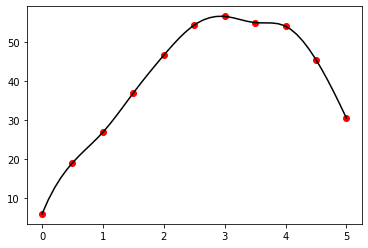

In [5]:
import scipy.interpolate as interp

x=np.linspace(0,5,11)
y=np.array([5.84, 18.95, 26.81, 36.89, 46.57, 54.32,
            56.54, 54.94, 54.03, 45.44, 30.44])

xx=np.linspace(0,5,50)

# scipy cubic spline function
cs=interp.CubicSpline(x,y)
yy=cs(xx)

plt.plot(x,y,'ro')
plt.plot(xx,yy,'k-')
plt.show()

Try extending the range of `xx` to the left of right, and you can see why cubibc splines do a better job at avoiding the oscillations associated with higher-order interpolants.

<a id='exer'></a>



### Practice Problems

(1) Recall Charles' law for an ideal gas: pressure changes proportionally to temperature. In other words, the pressure is a linear function of temperature. Data corresponding to an experiment measuring temperature and pressure of a gas is given below:

$$\begin{matrix} {T (^\circ {\rm C})} & 0 & 10 & 20 & 30 & 40 & 50 & 60 & 70 & 80 & 90 & 100\\{\rm p ({\rm atm.})}& 0.94 & 0.96 & 1.0 & 1.05 & 1.07 & 1.09 & 1.14 & 1.17 & 1.21 & 1.24& 1.28 \end{matrix}$$

Plot this data, fit a linear equation through this data, and calculate the coefficient of determination.

Next, we know that the pressure of an ideal gas is zero at absolute zero temperature. So, use the linear fit you obtained to determine the absolute zero temperatue in $^\circ$C. How does this compare to the actual absolute zero value of $-273.15^\circ$C?

(2) A cup of coffee contains about 100 mg of caffeine. The following data set shows approximate caffeine levels in mg remaining in blood every few hours after consumption. 

$$\begin{matrix} {\rm Time~(hours)} & 0 & 3 & 6 & 9 & 12 & 15 & 18 & 21 & 24\\{\rm Caffeine~(mg)}& 101.37 &  63.73&  41.34&  28.86&
        13.90&  14.11&  6.75 &  5.14& 5.79 \end{matrix}$$
        
Plot these data sets (generate the time using a `arange` function). Molecules like caffeince decay exponentially as they are metabolizes. What should your axes be for this data to 'look' like a straight line?

Based on this information, find the best nonlinear function to fit the data. Plot the fit on top of the data. Find the $R^2$.

The 'half life' of a material is the time it takes it to reduce to half of the original value. This is a common indicator of the lingering activity of radioactive substances (radium has a half life of about 1600 years!) and drugs (most antibiotics have a half life of few hours in our bodies). Based on your fit, determine the half life of caffeine in blood.

(3) The population of California in the last century is given below (from https://www.census.gov) 

$$\begin{matrix} {\rm Year} & {\rm Population} \\ 1920 & 3,426,861 \\ 1930 & 5,677,251\\ 1940 & 6,907,387\\ 1950 & 10,586,223\\ 1960 & 15,717,204\\ 1970 & 19,953,134\\ 1980 & 23,667,902\\1990 & 29,760,021\\2000 & 33,871,648\\2010 & 37,253,956 \end{matrix}$$

Use both Lagrange polynomials and splines to interpolate between these data points to plot population for every year in this period.

Now try to 'extrapolate' using both methods to 2020. Which method seems reasonable? Why or why not? What's the source of error?

(4) Make a 'packaged' funtion `powerfit` that takes in x and y values, and returns constants corresponding to a fit of the type $y=a x^b$. The function should also return a third parameter corresponding to $R^2$.

(5) Return to the COVID-19 data from New York Times that we have used in previous tutorials. Real growth and infection data may not be accurate in the first few days because of delays in gathering data, so epidemiologists often count 'cases since first 100'. By counting statistics and developing models only after about a 100 cases have been confirmed, we eliminate noise due to initial uncertainities and therefore get more reliable data.

In case of California, this would correspond to about day 40 in the data set. Extract number of cases in CA between days 40 and 70 (a period corresponding approximately to the month of March 2020) and plot to see how this data looks. From all you have been hearing in the news, we would imagine that the initial growth was exponential. So try fitting an exponential to this data. How good is this fit for the month of March?

Now plot the actual current data until this week and see how the fit from March compares to the real trend in April. Are the actual numbers below or above the predicted fit? It  could mean that California's shelter-in-place rules are working and number of cases are way below what it could have been if exponential growth from March had continued. 

You could even estimate the 'growth rate' since March by fitting another exponential to the data since day 70. Do you expect the growth rate to be bigger or smaller than before? Try visualizing both these fits with the data simultaneouly.